#                                  Summer football transfer 2022

# Agenda

    - Introduce the Data
    - Basic Data Cleaning
        Dealing with data types
        Handling missing data
        
    - More Data Exploration
        Outlier detection
        Plotting distributions
        
    - Feature Engineering
        Interactions between features
        
    - Feature Selection and Model Building

# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io, requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.relative_locator import locate_with
import time

C:\Users\10\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# 

 <h2 style="color:blue;">Read data and display it</h2>

In [2]:
data = pd.read_csv('Summer22_FootballTransfers.csv')

In [3]:
data.head(5)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


# 

<h2 style="color:blue;">Data insigths</h2>

In [4]:
print("Data has  " + str(data.shape[0]) + "  records and  " + str(data.shape[1]) + "  features")

Data has  33625  records and  11  features


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33620 non-null  object 
 1   position             33615 non-null  object 
 2   age                  33477 non-null  float64
 3   origin_club          33620 non-null  object 
 4   league_origin_club   32685 non-null  object 
 5   country_origin_club  32690 non-null  object 
 6   new_club             33615 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  object 
 10  date_of_transfer     33625 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [6]:
data.isna().sum()         # na values

name                      5
position                 10
age                     148
origin_club               5
league_origin_club      940
country_origin_club     935
new_club                 10
league_new_club        5578
country_new_club       5574
cost                      4
date_of_transfer          0
dtype: int64

# 

# 

<h2 style="color:blue;">Data cleaning</h2>
<div>
    
    1 data in wrong format --> 'cost' column data type
    2 data missing at ['age', 'postiton', 'origin_club', 'new_club']
    3 wrong Data
</div>

## 1 Customize datatype of   ' cost '   column as integer value

In [7]:
data.cost.head(2)

0    €42.00m
1    €18.00m
Name: cost, dtype: object

In [8]:
data.cost.dtype

dtype('O')

In [9]:
def customizer(val):
    str(val)          # we used str() because float-point number not accessable ---> 'float value is not subscriptable object'
    if (val[-1] == 'm'): 
        val = pd.to_numeric(val[1:-1])  
        return val*10**6
    
    else:
        val = pd.to_numeric(val[1:-3])
        return val*10**3

In [10]:
customizer("€1th.")

1000

In [11]:
data.cost = data.cost.apply(lambda val : pd.to_numeric(str(val)[1:-1])*10**6 if(str(val)[-1] == 'm') else pd.to_numeric(str(val)[1:-3])*10**3)

In [103]:
data.head(2)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000.0,9/1/2022


# 

In [104]:
data.dtypes

name                    object
position                object
age                    float64
origin_club             object
league_origin_club      object
country_origin_club     object
new_club                object
league_new_club         object
country_new_club        object
cost                   float64
date_of_transfer        object
dtype: object

In [105]:
data.age.describe()

count    33477.000000
mean        25.020432
std          4.784488
min         15.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         46.000000
Name: age, dtype: float64

In [106]:
data.age = data.age.astype('f2')

In [107]:
data.cost.describe()

count    3.362100e+04
mean     4.783108e+05
std      2.429271e+06
min      8.000000e+03
25%      5.000000e+04
50%      1.000000e+05
75%      2.500000e+05
max      1.500000e+08
Name: cost, dtype: float64

In [108]:
data.cost = data.cost.astype('f4')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33620 non-null  object 
 1   position             33615 non-null  object 
 2   age                  33477 non-null  float16
 3   origin_club          33620 non-null  object 
 4   league_origin_club   32685 non-null  object 
 5   country_origin_club  32690 non-null  object 
 6   new_club             33615 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  float32
 10  date_of_transfer     33625 non-null  object 
dtypes: float16(1), float32(1), object(9)
memory usage: 2.5+ MB


# 

## 2 Wrong Data

In [13]:
data[ data['country_origin_club'] == 'Egypt' ]

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
36,Mohamed Sobhi,Goalkeeper,23.0,Zamalek SC,Premier League,Egypt,Pharco FC,Premier League,Egypt,€500Th.,9/1/2022
41,Mohanad Lasheen,Central Midfield,26.0,Tala'ea El Gaish,Premier League,Egypt,Future FC,Premier League,Egypt,€500Th.,9/1/2022
42,Mohamed Reda,Central Midfield,21.0,Wadi Degla FC,Egypt,Egypt,Future FC,Premier League,Egypt,€150Th.,9/1/2022
43,Ahmed Atef,Centre-Forward,24.0,Wadi Degla FC,Egypt,Egypt,Future FC,Premier League,Egypt,€200Th.,9/1/2022
56,Yassin Marei,Centre-Back,20.0,Zamalek SC U21,Egypt,Egypt,Pharco FC,Premier League,Egypt,€50Th.,9/1/2022
...,...,...,...,...,...,...,...,...,...,...,...
32786,Mostafa El Rouby,Goalkeeper,21.0,Wadi Degla FC U23,Egypt,Egypt,Without Club,NaN,NaN,€25Th.,7/1/2022
32807,Moaz Ahmed,Centre-Back,19.0,Wadi Degla FC U23,Egypt,Egypt,Without Club,NaN,NaN,€25Th.,7/1/2022
33287,Marwan Shawky,Centre-Forward,22.0,Wadi Degla FC,Egypt,Egypt,Without Club,NaN,NaN,€25Th.,7/1/2022
33351,Alaa Abbas,Left Winger,31.0,Harras El Hodoud,Premier League,Egypt,Without Club,NaN,NaN,€50Th.,7/1/2022


In [111]:
#drop unuseful features
data.drop([ 'league_origin_club' , 'league_new_club' , 'date_of_transfer' ], axis=1, inplace= True)

# 

## 3 Missing Data in ' position ' Column

In [112]:
data.position.isna().sum()

10

In [113]:
c = 0
for i in data.position.isna():
    if i == True: 
        print(c)
    c+=1

2753
2754
2755
2756
2757
25188
25189
25190
25191
25192


In [114]:
data[ 25188:25193 ]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
25188,Eljo Iba,NaN,NaN,NaN,Indonesia,Persipura Jayapura,Indonesia,100000.0
25189,Ángel Robles,NaN,NaN,NaN,Mexico,Club Atlético Morelia,Mexico,200000.0
25190,Gian-Luca Reck,NaN,NaN,NaN,Germany,1.FC Bocholt,Germany,10000.0
25191,Kian Harratt,NaN,NaN,NaN,England,Bradford City,England,50000.0
25192,Michael Pavlovic,NaN,NaN,NaN,Slovenia,FC Koper,Slovenia,300000.0


In [115]:
playersNames = data.name[25188:25193].tolist()
playersNames

['Eljo Iba',
 'Ángel Robles',
 'Gian-Luca Reck',
 'Kian Harratt',
 'Michael Pavlovic']

In [ ]:
ffx = webdriver.Chrome()

ffx.get("https://www.transfermarkt.com")

print('position    age')

li7 = []

for i in playersNames:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    
    for player in ffx.find_elements(By.CSS_SELECTOR,'td[class= "zentriert"]'):
        li7.append(player.text)
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li7)

In [116]:
data.fillna({'position': {25188: 'Right-Back' , 25189: 'Centre-Forward', 25190: 'GoalKeeper', 25191: 'attack', 25192: 'Left-Back'} 
              , 'age': {25188: 29 , 25189: 21, 25190: 20, 25191: 20, 25192: 21}
              , 'origin_club': {25188: 'Persiba' , 25189: 'Puebla', 25190: 'Lippstadt', 25191: 'Huddersfield Town', 25192: 'Olimpija'}}
             ,inplace=True)

In [117]:
data[ 2753:2758 ]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
2753,NaN,NaN,25.0,Without Club,NaN,University of Pretoria FC,South Africa,25000.0
2754,NaN,NaN,30.0,Difaâ El Jadida,Morocco,Olympique Khouribga,Morocco,325000.0
2755,NaN,NaN,22.0,HNK Cibalia Vinkovci,Croatia,NK Lucko,Croatia,100000.0
2756,NaN,NaN,25.0,Torino FC,Italy,Palermo FC,Italy,1600000.0
2757,NaN,NaN,22.0,FC Porto,Portugal,Casa Pia AC,Portugal,3000000.0


In [118]:
data.fillna({'position': {2753: 'Right-Back' , 2754: 'Centre-Forward', 2755: 'Centre-Back', 2756: 'midfield', 2757: 'midfield'}},inplace=True)

# 

## data missing in ' new_club ' column

In [119]:
data.isna().sum()         # na values

name                      5
position                  0
age                     143
origin_club               0
country_origin_club     935
new_club                 10
country_new_club       5574
cost                      4
dtype: int64

In [120]:
c = 0
for i in data.new_club.isna():
    if i == True: 
        print(c)
    c+=1

5420
5421
5422
5423
9278
9279
31461
31462
31463
31464


position 
age
apperance', 'goals', 'assists', 'yellow_card', '2nd_ycard', 'red_card', ,'min', 'apperance_NT', 'goals_NT', 'assists_NT', 'yellow_card_NT', '2nd_ycard_NT', 'red_card_NT', ,'min_NT'
,'world_rank', 'league_rank', 'club_rank', 'National_rank', 'position_rank'
cost

In [121]:
data[5420:5424]  

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
5420,Matteo Gullo,attack,22.0,Rende Calcio 1968,Italy,NaN,Italy,10000.0
5421,Hamed Alizadeh,Attacking Midfield,22.0,Rayka Babol,Iran,NaN,Iran,50000.0
5422,Thanachach Phocha,Centre-Back,21.0,Muangkan United,Thailand,NaN,Thailand,50000.0
5423,Richard Keogh,Centre-Back,35.0,Blackpool FC,England,NaN,England,250000.0


In [122]:
names = data.name[5420:5424].tolist()
print(names)

['Matteo Gullo', 'Hamed Alizadeh', 'Thanachach Phocha', 'Richard Keogh']


In [ ]:
ffx = webdriver.Chrome()

ffx.get("https://www.transfermarkt.com")
li8 = []
for i in names:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    player = ffx.find_element(By.CSS_SELECTOR,'td[class= "hauptlink"]')
    url = player.find_element(By.TAG_NAME,'a').get_attribute('href')
    ffx.get(url)
    li8.append(ffx.find_element(By.CSS_SELECTOR,'[class="data-header__club"]').find_element(By.TAG_NAME,'a').text)
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li8)

In [123]:
li8 = ['Vigor Lamezia', 'Darya Caspian', 'Banbueng FC', 'Ipswich']

In [124]:
dic = dict( zip( [x for x in range(5420,5424,1)] ,li8) )
dic

{5420: 'Vigor Lamezia',
 5421: 'Darya Caspian',
 5422: 'Banbueng FC',
 5423: 'Ipswich'}

In [125]:
data.fillna({'new_club': dic },inplace=True)

# 

In [126]:
data[9278:9280]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
9278,Uros Poljanec,Goalkeeper,30.0,NK Vinodol,NaN,NaN,Slovenia,10000.0
9279,Bastien Héry,Central Midfield,30.0,Finn Harps,NaN,NaN,Ireland,50000.0


In [127]:
names = data.name[9278:9280].tolist()
print(names)

['Uros Poljanec', 'Bastien Héry']


In [364]:
ffx = webdriver.Chrome()

ffx.get("https://www.transfermarkt.com")
li1 = []
for i in names:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    player = ffx.find_element(By.CSS_SELECTOR,'td[class= "hauptlink"]')
    url = player.find_element(By.TAG_NAME,'a').get_attribute('href')
    ffx.get(url)
    li1.append(ffx.find_element(By.CSS_SELECTOR,'[class="data-header__club"]').find_element(By.TAG_NAME,'a').text)
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li1)

['NK Pesnica', 'Galway United']


In [128]:
li1 = ['NK Pesnica', 'Galway United']

In [129]:
dic = dict(zip([9278,9279], li1))
dic

{9278: 'NK Pesnica', 9279: 'Galway United'}

In [130]:
data.fillna({'new_club': dic},inplace=True)

# 

In [131]:
data[31461:31465]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
31461,Farid Mohammadian,Defensive Midfield,NaN,Esteghlal Mollasani,NaN,NaN,NaN,50000.0
31462,Sajjad Abbasi,Attacking Midfield,30.0,Mes Shahr Babak FC,NaN,NaN,NaN,100000.0
31463,Abdallahi Mahmoud,Central Midfield,22.0,Deportivo Alavés B,NaN,NaN,Spain,600000.0
31464,Gleb Shilov,Right-Back,22.0,Khimik Dzerzhinsk,NaN,NaN,NaN,75000.0


In [132]:
names = data.name[31461:31465].tolist()
print(names)

['Farid Mohammadian', 'Sajjad Abbasi', 'Abdallahi Mahmoud', 'Gleb Shilov']


In [ ]:
ffx = webdriver.Chrome()

ffx.get("https://www.transfermarkt.com")
li2 = []
for i in names:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    player = ffx.find_element(By.CSS_SELECTOR,'td[class= "hauptlink"]')
    url = player.find_element(By.TAG_NAME,'a').get_attribute('href')
    ffx.get(url)
    li2.append(ffx.find_element(By.CSS_SELECTOR,'[class="data-header__club"]').find_element(By.TAG_NAME,'a').text)
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li2)

In [133]:
li2 = ['Without Club', 'Without Club', 'Alavés', 'Without Club']

In [134]:
dic = dict(zip([x for x in range(31461,31465,1)], li2))
dic

{31461: 'Without Club',
 31462: 'Without Club',
 31463: 'Alavés',
 31464: 'Without Club'}

In [135]:
data.fillna({'new_club': dic},inplace=True)

# 

## data missing in ' cost ' column

In [136]:
data.cost.isna().sum()         # na values

4

In [137]:
c = 0
for i in data.cost.isna():
    if i == True: 
        print(c)
    c+=1

21008
21009
21010
21011


In [138]:
data[21008:21012]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
21008,Federico Scappi,Centre-Back,28.0,AS Fidentina,Italy,AC Fabbrico,NaN,NaN
21009,Mihkel Ainsalu,Central Midfield,26.0,FCI Levadia,Estonia,SC Telstar,NaN,NaN
21010,Andrea Grassi,Central Midfield,28.0,ASD Gabicce Gradara,Italy,La Fiorita 1967,NaN,NaN
21011,Michele Turci,Right-Back,27.0,ASD Savignanese,Italy,Sasso Marconi 1924,NaN,NaN


In [139]:
namesOfcost = data.name[21008:21012].tolist()
namesOfcost

['Federico Scappi', 'Mihkel Ainsalu', 'Andrea Grassi', 'Michele Turci']

In [381]:
ffx = webdriver.Chrome()

ffx.get("https://www.transfermarkt.com")
li3 = []
for i in namesOfcost:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    
    player = ffx.find_element(By.CSS_SELECTOR,'td[class= "rechts hauptlink"]')
    li3.append(player.text)
    
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li3)

['€75Th.', '€100Th.', '€10Th.', '€75Th.']


In [140]:
li3 = ['€75Th.', '€100Th.', '€10Th.', '€75Th.']

In [141]:
customizer('€75Th.')

75000

In [142]:
dic = dict(zip([x for x in range(21008,21012,1)], [ customizer(y) for y in li3]))
dic

{21008: 75000, 21009: 100000, 21010: 10000, 21011: 75000}

In [143]:
data.fillna({'cost': dic},inplace=True)

# 

# 

<h2 style="color:blue;">Data cleaning</h2>
<div>
    
    1 data in wrong format --> 'cost' column data type                                ------------->   Done
    2 wrong Data                                                                      ------------->   Done
    3 data missing at ['age', 'postiton', 'origin_club', 'new_club']                  ------------->   Done Expect age col
    
</div>

### Fillna Age column

In [144]:
data.isna().sum()

name                      5
position                  0
age                     143
origin_club               0
country_origin_club     935
new_club                  0
country_new_club       5574
cost                      0
dtype: int64

In [145]:
print('Average in ')
for i in data['country_origin_club'].value_counts().index[0:].to_list():
    print( f'{i} :        { data.age[data.country_origin_club == i].mean() }' )

Average in 
Italy :        inf
Spain :        inf
Germany :        23.71875
Russia :        23.734375
Turkey :        25.859375
England :        25.21875
France :        24.921875
Romania :        23.859375
Greece :        25.8125
Serbia :        24.015625
Iran :        26.734375
Portugal :        25.453125
Bosnia-Herzegovina :        23.875
Netherlands :        23.5625
Croatia :        22.1875
Switzerland :        24.125
Hungary :        25.359375
Slovakia :        22.84375
Czech Republic :        24.5
Bulgaria :        24.265625
Poland :        24.9375
Brazil :        25.9375
Belgium :        25.015625
Israel :        25.59375
Ukraine :        25.203125
Thailand :        27.390625
Slovenia :        23.03125
Austria :        23.609375
Indonesia :        26.484375
Wales :        25.25
Mexico :        24.90625
Denmark :        23.734375
Scotland :        24.703125
Cyprus :        26.78125
China :        25.609375
Algeria :        26.71875
South Africa :        27.453125
India :        2

In [146]:
c = 0
namesOfAge = []
indexOfAge = []
for i in data.age.isna():
    if i == True: 
        namesOfAge.append(data.name.iloc[c])
        indexOfAge.append(c)
    c+=1

In [52]:
print(len(namesOfAge))
namesOfAge

143


['Mohammadmehdi Mohammadpour',
 'Harry Irving',
 'Ebrahim Moradi',
 'Hadi Kianpour',
 'Tawfik Idsghir',
 'Azad Jafarzadeh',
 'Hamed Ketab Ghaleh',
 'Mohammadreza Eghbali',
 'Vahid Amani',
 'Mohammed Ajeel',
 'Ali Hadadifar',
 'Salim Barhoom',
 'Asghar Khosravi',
 'Mohammad Savari',
 'Saeid Mehrali',
 'Moses Odo',
 'Amir Mohammad Monsef',
 'Matin Parsa',
 'Igor Kukulicic',
 'Anil Julevic',
 'Arya Kamali',
 'Enock Lusiama',
 'Nader Mohammadnejad',
 'Amir Alidadi',
 'Ghadir Aghajani',
 'Seth Karunaratne',
 'Touraj Aghayari',
 'Keyvan Salehi',
 'Mick Reid',
 'Jordan Neal',
 'Mojtaba Khosravi',
 'Joe Davis',
 'Jovan Radisic',
 'Malik Sylvester',
 'Amer Dandashi',
 'Jonibek Kochimov',
 'Abdumutal Tursunkulov',
 'Alireza Ebrahimi',
 'Majd Khushman',
 'Gabriel Thór Thórdarson',
 'Mohammad Norouzi',
 'Sajjad Terjerou',
 'Ibrahim Al-Taweel',
 'Mehdi Berihi',
 'Abbas Kandoul',
 'Farid Hamrang',
 'Mohammadreza Raoufi Manesh',
 'Rabie Sorur',
 'Reza Rezaei',
 'Luke White',
 'Jack Mitchell',
 'Sohra

In [ ]:
ffx = webdriver.Chrome()
ffx.get("https://www.transfermarkt.com")
print('index :    age ')
li4 = []
Idx = []
try:
    for i in namesOfAge:
        ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
        ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
        for player in ffx.find_elements(By.CSS_SELECTOR,'td[class= "zentriert"]'):
            x = player.text
            li4.append(x[2])
        if li4[2] != '-' :
            c = data[data.name == i ].index[0]
            print(f'{c}   :  {li4[2]}')
            Idx.append(c)
        ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
        c+=1
except :
    c+=1
ffx.quit()
print(Idx)
print(li4)

In [ ]:
li4

In [147]:
ages = [37, 22, 22, 32, 38, 27, 29, 29, 20, 54, 23, 54, 23, 40, 29, 28, 27, 30]
Idx = [4495,6973, 8253, 10008, 12395, 12564, 13974, 23171, 25742, 25945, 26003, 26074, 27572, 32895, 33174, 33243,33423,29557]

In [148]:
dic = dict(zip(Idx, ages))
dic

{4495: 37,
 6973: 22,
 8253: 22,
 10008: 32,
 12395: 38,
 12564: 27,
 13974: 29,
 23171: 29,
 25742: 20,
 25945: 54,
 26003: 23,
 26074: 54,
 27572: 23,
 32895: 40,
 33174: 29,
 33243: 28,
 33423: 27,
 29557: 30}

In [149]:
data.fillna({'age': dic},inplace=True)

In [150]:
c = 0
li5 = []
for i in data.country_origin_club.isna():
    if i == True: 
        li5.append(c)
    c+=1

In [151]:
clubs = []
index = []
for i in li5:
    if data.origin_club.loc[i] !=  "Without Club" and data.origin_club.loc[i] != 'Unknown' and data.origin_club.loc[i] != 'Career break':
        clubs.append(data.origin_club.loc[i])
        index.append(i)

In [152]:
clubs

['NK Vinodol',
 'Finn Harps',
 'Disqualification',
 'Esteghlal Mollasani',
 'Mes Shahr Babak FC',
 'Deportivo Alavés B',
 'Khimik Dzerzhinsk']

In [ ]:
ffx = webdriver.Chrome()
li6 = []
ffx.get("https://www.transfermarkt.com")
for i in clubs:
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').send_keys(i) # Search with player name
    ffx.find_element(By.CSS_SELECTOR,'[class="tm-header__input--search-send"]').send_keys(Keys.ENTER) # press Enter Key
    try:
        x = ffx.find_element(By.CSS_SELECTOR,'img[class= "flaggenrahmen"]').get_attribute('alt')
        li6.append(x)
    except :
        li6.append('unknown')
    ffx.find_element(By.CSS_SELECTOR, '[class="tm-header__input--search-field"]').clear()
ffx.quit()
print(li6)

In [153]:
li6 = ['Croatia', 'Ireland', 'unknown', 'Iran', 'Iran', 'Spain', 'Russia']

In [154]:
dic = dict(zip(index,li6))

In [155]:
data.fillna({'country_origin_club': dic},inplace=True)

### Replace na values in age column

In [156]:
data.age.isna().sum()         # na values

126

In [157]:
data['country_origin_club'][data.age.isna()].value_counts()

Iran            68
Syria            8
Wales            8
New Zealand      7
Guatemala        5
South Africa     5
Montenegro       3
Panama           3
Uzbekistan       2
Tunisia          2
Kosovo           2
Indonesia        1
El Salvador      1
Spain            1
Slovakia         1
Denmark          1
Lebanon          1
Timor-Leste      1
Iceland          1
Canada           1
Iraq             1
Morocco          1
France           1
Name: country_origin_club, dtype: int64

In [158]:
countries = data['country_origin_club'][data.age.isna()].value_counts().index.tolist()
countries

['Iran',
 'Syria',
 'Wales',
 'New Zealand',
 'Guatemala',
 'South Africa',
 'Montenegro',
 'Panama',
 'Uzbekistan',
 'Tunisia',
 'Kosovo',
 'Indonesia',
 'El Salvador',
 'Spain',
 'Slovakia',
 'Denmark',
 'Lebanon',
 'Timor-Leste',
 'Iceland',
 'Canada',
 'Iraq',
 'Morocco',
 'France']

In [159]:
for country in countries:
    li = []
    Idx = data[ ( data.age.isna() ) & ( data.country_origin_club == country ) ].index.tolist()
    avg = data['age'][data.country_origin_club == country ].mean()
    li.append(avg)
    li *= len(Idx)
    dic = dict(zip( Idx , li ))
    data.fillna({'age': dic }, inplace=True)

In [160]:
data[data.age.isna()]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
33274,Pedro Chic,midfield,NaN,Without Club,NaN,Quiché FC,Guatemala,10000.0


In [161]:
data[data.age.isna()] = data[data.age.isna()].fillna(data.age.median())

# 

## Duplicated Data

In [162]:
data[data.duplicated(keep=False)].head(60)

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
51,Roman Vantukh,Left-Back,24.0,Dynamo Kyiv,Ukraine,Zorya Lugansk,Ukraine,400000.0
3681,Jesús Vázquez,Centre-Back,27.0,Rio Grande Valley FC Toros,United States,Indy Eleven,United States,225000.0
4787,Halim Darragi,Left Winger,32.0,Al-Dahab Club,Saudi Arabia,EO Sidi Bouzid,Tunisia,100000.0
4954,Halim Darragi,Left Winger,32.0,Al-Dahab Club,Saudi Arabia,EO Sidi Bouzid,Tunisia,100000.0
6399,Miloud Rebiai,Defensive Midfield,28.0,MC Algiers,Algeria,CR Belouizdad,Algeria,350000.0
6977,Miloud Rebiai,Defensive Midfield,28.0,MC Algiers,Algeria,CR Belouizdad,Algeria,350000.0
7708,Johann Hoseth Kosberg,attack,22.0,Stjördals Blink IL,Norway,Ullensaker/Kisa IL,Norway,50000.0
8733,Robert Odu,Centre-Forward,23.0,Al-Taraji,Saudi Arabia,Qilwah Club,Saudi Arabia,150000.0
10743,Jesús Vázquez,Centre-Back,27.0,Rio Grande Valley FC Toros,United States,Indy Eleven,United States,225000.0
11652,Robert Odu,Centre-Forward,23.0,Al-Taraji,Saudi Arabia,Qilwah Club,Saudi Arabia,150000.0


In [163]:
data.drop_duplicates(keep='first', inplace=True)

# 

## Outliers

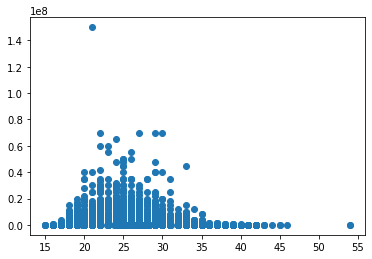

In [164]:
plt.scatter(data.age, data.cost)
plt.show()

## age outliers

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


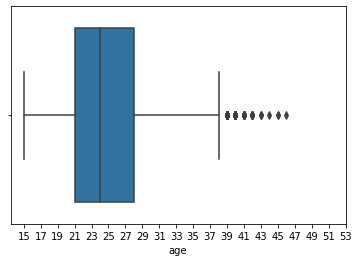

In [12]:
%matplotlib inline
s = sns.boxplot(data['age'])
s.set_xticks(np.arange(15,55,2))
plt.show()

In [166]:
ageOutliers = data[data.age > 38].index.tolist()

# 

### cost outliers

In [167]:
data[data.cost == 150000000]

,name,position,age,origin_club,country_origin_club,new_club,country_new_club,cost
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Germany,Manchester City,England,150000000.0


In [168]:
data.cost.describe()

count    3.361800e+04
mean     4.783091e+05
std      2.429414e+06
min      8.000000e+03
25%      5.000000e+04
50%      1.000000e+05
75%      2.500000e+05
max      1.500000e+08
Name: cost, dtype: float64

C:\Users\10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


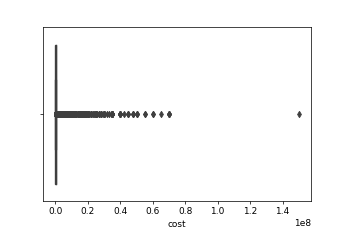

In [169]:
%matplotlib inline
%matplotlib notebook
s = sns.boxplot(data.cost)
plt.show()

In [175]:
costOutliers = data[data.cost > 550000].index.tolist()

In [15]:
for u in [11108, 16824, 19884]:
    costOutliers.remove(u)

NameError: name 'costOutliers' is not defined

In [172]:
print(data.shape)
#data.drop(ageOutliers, inplace= True)
#data.drop(costOutliers, inplace= True)
print(data.shape)

(30174, 8)


KeyError: '[11108 16824 19884] not found in axis'

## data visulizatoin

In [131]:
data.age.min()

15.0

In [132]:
data.age.max()

54.0

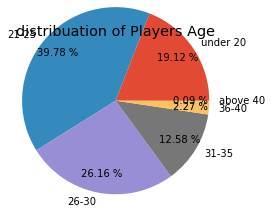

In [133]:
plt.style.use('ggplot')
%matplotlib inline

L15_20 = len(data[(data.age >= 15) & (data.age <= 20) ])
L21_25 = len(data[(data.age >= 21) & (data.age <= 25) ])
L26_30 = len(data[(data.age >= 26) & (data.age <= 30) ])
L31_35 = len(data[(data.age >= 31) & (data.age <= 35) ])
L36_40 = len(data[(data.age >= 36) & (data.age <= 40) ])
L41_46 = len(data[(data.age >= 41) & (data.age <= 46) ])

ageRanges = [L15_20, L21_25, L26_30, L31_35, L36_40, L41_46]
label = ['under 20', '21-25', '26-30', '31-35', '36-40', 'above 40']
#explode = (.4,.2,0,0,.4)

plt.title('distribuation of Players Age')

plt.pie(ageRanges, labels=label, pctdistance=0.8,autopct='%.2f %%', radius=2)
plt.tight_layout()
plt.show()

<BarContainer object of 6 artists>

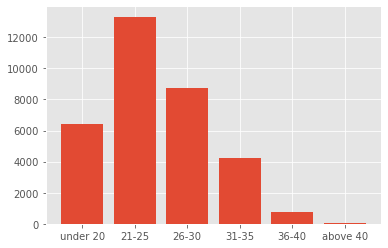

In [134]:
plt.bar(label,ageRanges)

<IPython.core.display.Javascript object>


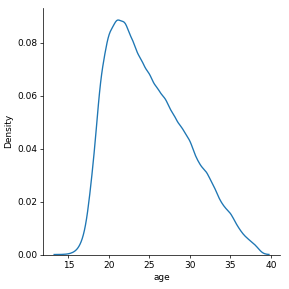

In [83]:
sns.displot(data.age,kind='kde')

<IPython.core.display.Javascript object>


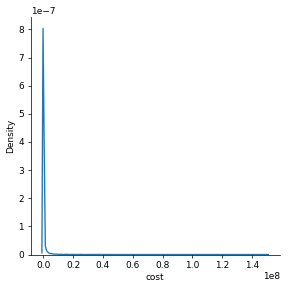

In [84]:
sns.displot(data.cost,kind='kde')

<AxesSubplot:xlabel='age', ylabel='Count'>

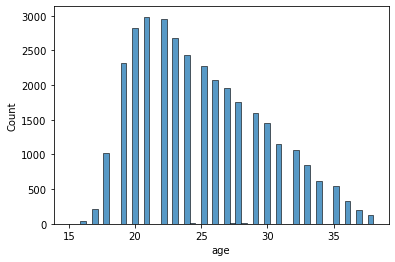

In [85]:
%matplotlib inline
sns.histplot(data.age)

In [86]:
%matplotlib inline
sns.histplot(data.cost)

<AxesSubplot:xlabel='cost', ylabel='Count'>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002B774F36F70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002B774F498B0> (for post_execute):


KeyboardInterrupt: 

# 

In [87]:
#data.drop(['name','country_origin_club','country_new_club'], axis=1, inplace =True)

In [60]:
data.to_csv('Cleaned Data')